# Meta-Heur√≠ticas : Trabalho Pr√°tico 1 

- Aym√™ Faustino dos Santos - 4704
- Pedro Augusto Martins Pereira - 4692
- Henrique Alves Campos - 4231

O trabalho consiste em implementar duas meta-heur√≠ticas para minimizar duas fun√ß√µes objetivo, cada uma em dois intervalos diferentes, sendo o segundo, um intervado mais restrito contido no primeiro intervalo.

## Bibliotecas Necessarias

In [1]:
import math
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## 1. Fun√ß√µes Objetivo 

### 1.1 Representa√ß√£o da Solu√ß√£o

Vamos utilizar um vetor para representar as vari√°veis de decis√£o. Na fun√ß√£o objetivo 1 ele ter√° tamanho dois pois temos duas variaveis de decis√£o po≈ïem na fun√ß√£o objetivo 2 temos quatro variaveis de decis√£o sendo assim ele ter√° tamanho quatro.

### 1.2 Fun√ß√£o Objetivo 1



1.2.1 Intervalos 

a) - 100 <= x1 e x2 <= 100

b) -20 <= x1 e x2 <= 20

In [2]:
def funcao_objetivo_01(solucao):
    sum_sq = np.sum(np.square(solucao))
    raiz = np.sqrt(sum_sq)
    return 1 - np.cos(2 * np.pi * raiz) + 0.1 * raiz

intervalo1_a = [-100,100]
intervalo1_b = [-20,20]

1.2.2 Superficie

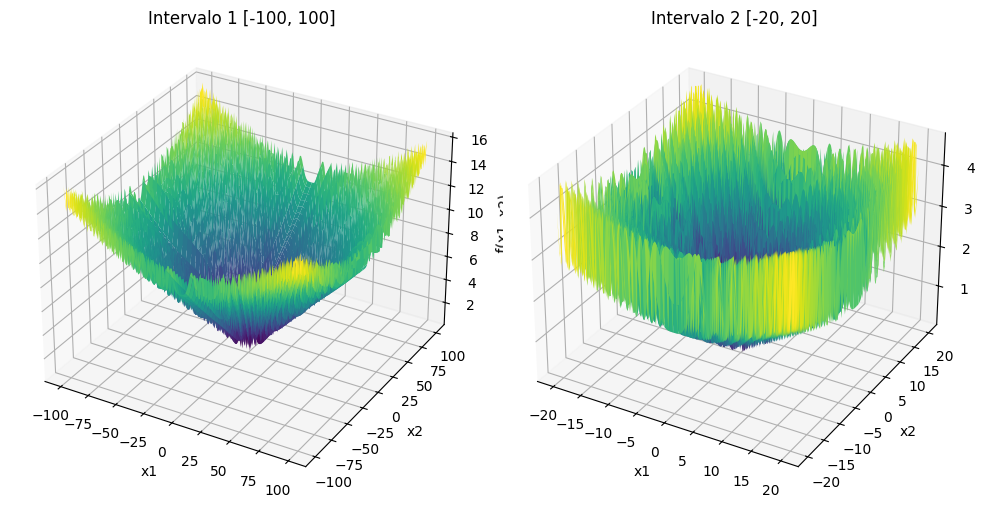

In [3]:
def plotar_superficies(intervalos, titulos):
    fig = plt.figure(figsize=(10, 5))  

    for i, (intervalo, titulo) in enumerate(zip(intervalos, titulos), start=1):
        x = np.linspace(intervalo[0], intervalo[1], 200)
        y = np.linspace(intervalo[0], intervalo[1], 200)
        X, Y = np.meshgrid(x, y)

        Z = np.array([[funcao_objetivo_01([x_, y_]) for x_, y_ in zip(x_row, y_row)] 
                      for x_row, y_row in zip(X, Y)])

        ax = fig.add_subplot(1, 2, i, projection='3d')  # 1 linha, 2 colunas
        surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
        ax.set_title(titulo)
        ax.set_xlabel('x1')
        ax.set_ylabel('x2')
        ax.set_zlabel('f(x1, x2)')

    plt.tight_layout()
    plt.show()

intervalos = [(-100, 100), (-20, 20)]
titulos = ['Intervalo 1 [-100, 100]', 'Intervalo 2 [-20, 20]']
plotar_superficies(intervalos, titulos)

### 1.3 Fun√ß√£o Objetivo 2

1.3.1 Intervalos

a)‚àí10 ‚â§ ùë•1, ùë•2, ùë•3, ùë•4 ‚â§ 10

b)‚àí2 ‚â§ ùë•1, ùë•2, ùë•3, ùë•4 ‚â§ 2

In [4]:
def funcao_objetivo_02(x):
    return (100 * (x[0]**2 - x[1])**2 +
            (x[0] - 1)**2 +
            (x[2] - 1)**2 +
            90 * (x[2]**2 - x[3])**2 +
            10.1 * ((x[1] - 1)**2 + (x[3] - 1)**2) +
            19.8 * (x[1] - 1) * (x[3] - 1))

intervalo2_a = [-10,10]
intervalo2_b = [-2,2]

1.3.2 Superficie

Como a fun√ß√£o f(x) depende de quatro vari√°veis, foi necess√°rio fixar x‚ÇÉ e x‚ÇÑ para permitir a visualiza√ß√£o em 3D. Assim, foi poss√≠vel analisar o comportamento da fun√ß√£o variando apenas x‚ÇÅ e x‚ÇÇ.

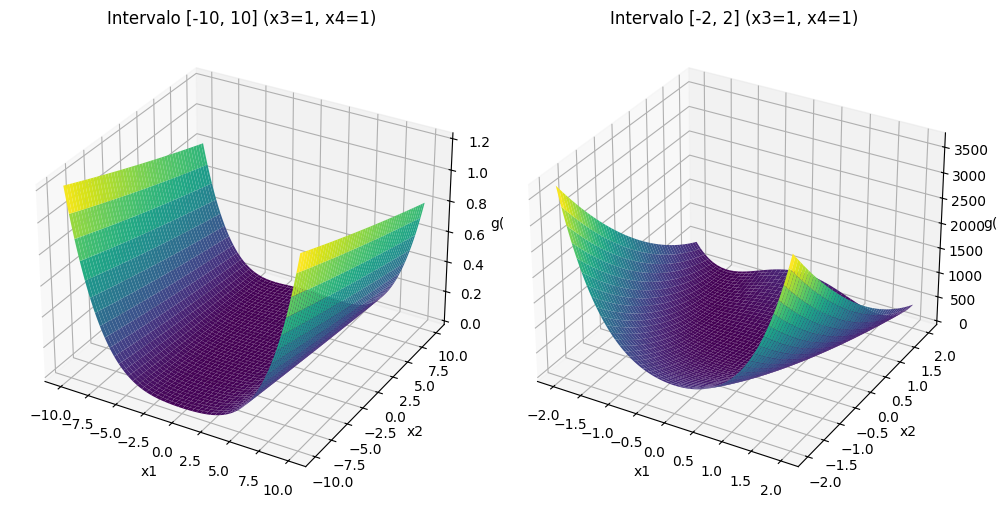

In [5]:
def plotar_superficies_2(intervalos, titulos, x3=1, x4=1):
    fig = plt.figure(figsize=(10, 5))

    for i, (intervalo, titulo) in enumerate(zip(intervalos, titulos), start=1):
        x = np.linspace(intervalo[0], intervalo[1], 200)
        y = np.linspace(intervalo[0], intervalo[1], 200)
        X, Y = np.meshgrid(x, y)

        Z = np.array([[funcao_objetivo_02([x_, y_, x3, x4]) for x_, y_ in zip(x_row, y_row)]
                      for x_row, y_row in zip(X, Y)])

        ax = fig.add_subplot(1, 2, i, projection='3d')
        surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
        ax.set_title(f"{titulo} (x3={x3}, x4={x4})")
        ax.set_xlabel('x1')
        ax.set_ylabel('x2')
        ax.set_zlabel('g(x)')

    plt.tight_layout()
    plt.show()

intervalo2_a = (-10, 10)
intervalo2_b = (-2, 2)
titulos = ["Intervalo [-10, 10]", "Intervalo [-2, 2]"]

plotar_superficies_2([intervalo2_a, intervalo2_b], titulos)

## 2. Meta-Heuristicas

Para minimiziar as fun√ß√µes objetivos vamos utilizar um algoritmo baseado em VNS (Variable Neighborhood Search) e um algoritmo baseado em #Escolher. Antes de implementar cada um deles vamos entender a ideia de cada uma dessas meta-heuristicas e quais decis√µes precisam ser tomadas em cada uma delas.

### 2.1 VNS (Variable Neighborhood Search) 

O Variable Neighborhood Search (VNS) √© uma metaheur√≠stica baseada na explora√ß√£o sistem√°tica de diferentes vizinhan√ßas para encontrar a solu√ß√£o √≥tima de um problema. A principal motiva√ß√£o do VNS √© evitar ficar preso em √≥timos locais, expandindo a busca para outras regi√µes do espa√ßo de solu√ß√µes.

Ele se baseia na seguinte ideia:
- Se uma solu√ß√£o √© um √≥timo local em uma vizinhan√ßa, ela pode n√£o ser em outra.
- Alternar entre diferentes vizinhan√ßas ajuda a escapar de √≥timos locais e encontrar melhores solu√ß√µes.

VNS √© eficiente, simples e vers√°til, sendo utilizado em problemas de otimiza√ß√£o combinat√≥ria e cont√≠nua.

#### 2.1.1 Pseudoc√≥digo do VNS B√°sico

Entrada: solu√ß√£o inicial `x`, n√∫mero m√°ximo de vizinhan√ßas `k_max`, n√∫mero m√°ximo de itera√ß√µes

1. x_best ‚Üê x

2. Para t = 1 at√© max_iter fa√ßa:

    3. k ‚Üê 1

    4. Enquanto k ‚â§ k_max fa√ßa:

        5.   Gerar x' na k-√©sima vizinhan√ßa de x_best

        6.   Aplicar busca local a partir de x', obtendo x''

        7.   Se f(x'') < f(x_best):

        8.       x_best ‚Üê x''

        9.       k ‚Üê 1   // reinicia vizinhan√ßa

        10.  Sen√£o:

        11.      k ‚Üê k + 1
        
12. Retornar x_best



Decis√µes importantes na implementa√ß√£o do VNS

- Solu√ß√£o Inicial
- Estrutura de Vizinhan√ßa
- Condi√ß√µes de Parada
- Estrat√©gia de Busca Local
- Quantidade de vizinhan√ßas (k_max)

### 2.1.2 Solu√ß√£o Inicial

Como a solu√ß√£o ser√° representada por meio de um vetor, uma estrat√©gia simples e muito utilizada na inicializa√ß√£o √© a de gerar uma solu√ß√£o aleat√≥ria preenchendo as posi√ß√µes do vetor com valores que estejam dentro de um intervalo pr√© definido para cada vari√°vel.

### 2.1.3 Metodo de busca local

#### Hill Climbing


O Hill Climbing √© um m√©todo de busca local que usa um procedimento de melhora iterativa, ou seja, a cada itera√ß√£o ele tenta melhorar a solu√ß√£o corrente sendo portanto um algoritmo gulosa que n√£o aceita piora. Seu algorimo para problemas de minimiza√ß√£o √©:

```
s --> solu√ß√£o candidata inicial
repita 
    r = perturba(copia(s)) --> faz uma perturba√ß√£o pequena na solu√ß√£o corrente para encontrar um nova solu√ß√£o
    se qualidade(r)<qualidade(s) ent√£o --> compara o valor da fun√ß√£o objetivo na nova solu√ß√£o com o da solu√ß√£o corrente
        s = r --> se melhoran atualiza solucao corrente
    --> se n√£o melhora n√£o faz nada
at√© condi√ß√£o de parada
retorne s
```

Analisando o algoritmo √© preciso definir:
* Como obter solu√ß√£o Inicial
* Como pertubarr uma solu√ß√£o
* Condi√ß√£o de Parada

#### Solu√ß√£o Inicial

Como o Hill Climbing vai ser utilizado como uma etapa do VNS a solu√ß√£o canditada vai ser definida no VNS.

#### Perturbar Solu√ß√£o

O algoritmo Hill Climbing realiza pequenas perturba√ß√µes na solu√ß√£o corrente, adicionando um valor aleat√≥rio, chamado de ru√≠do, em cada vari√°vel de decis√£o. O desafio √© controlar o tamanho da perturba√ß√£o para que ela seja pequena o suficiente para n√£o causar grandes varia√ß√µes, mas suficiente para explorar o espa√ßo de solu√ß√µes. Uma estrat√©gia poss√≠vel √© limitar o ru√≠do a um valor proporcional √† solu√ß√£o atual, utilizando uma porcentagem dentro de um intervalo especificado.

Ser√° utilizado um algoritmo que recebe o intervalo da porcentagem do ru√≠do como par√¢metro e escolhe aleatoriamente um valor dentro desse intervalo para cada vari√°vel de decis√£o. Isso permite que o m√©todo seja flex√≠vel e possa ser utilizado para perturba√ß√µes de diferentes magnitudes, dependendo da configura√ß√£o. O pseudoc√≥digo do algoritmo √© o seguinte:

```
min = valor m√≠nimo desejado para cada elemento do vetor
max = valor m√°ximo desejado para cada elemento do vetor

min_ruido = porcentagem m√≠nima do ru√≠do
max_ruido = porcentagem m√°xima do ru√≠do

v = quantidade de vari√°veis de decis√£o
vetor[v] = solu√ß√£o a ser perturbada

for i de 1 at√© v fa√ßa --> para cada elemento do vetor de vari√°veis
    ruido = n√∫mero aleat√≥rio [min_ruido, max_ruido]
    perturbacao = vetor[i] + ruido * (n√∫mero aleat√≥rio [min[i], max[i]] - vetor[i])

    se perturbacao < min[i] ou perturbacao > max[i] ent√£o
        enquanto perturbacao < min[i] ou perturbacao > max[i] fa√ßa
            ruido = n√∫mero aleat√≥rio [min_ruido, max_ruido]
            perturbacao = vetor[i] + ruido * (n√∫mero aleat√≥rio [min[i], max[i]] - vetor[i])
    
    adicionar perturbacao ao vetor

retornar vetor como array numpy

```

Para as pequenas pertuba√ß√µes vamos utilizar um ruido de 3% a 5%

#### Condi√ß√£o de parada

Existem v√°rias estrat√©gias que podem ser adotadas como condi√ß√£o de parada, como:
* certa quantidade de itera√ß√µes realizadas
* certa quantidade de avalia√ß√µes da fun√ß√£o objetivo realizadas
* limite de tempo gasto
* certo n√∫mero de itera√ß√µes sme melhoria da solu√ß√£o atual

Na implementa√ß√£o do Hill Climbing o crit√©rio de parada ser√° realizar 5 itera√ß√µes sem melhoria da solu√ß√£o atual 

### 2.1.4 Gerar solu√ß√£o inicial aleatoria

In [6]:
def solucaoInicialAleatoria(min, max, qtdVariaveisDecisao):
    v = []
    for i in range(qtdVariaveisDecisao):
        v.append(random.uniform(min[i], max[i]))
    return np.array(v)

### 2.1.5 Gerar pertuba√ß√µes 

In [7]:
def pertubacao(solucao, min, max, min_ruido, max_ruido, qtdVariaveisDecisao):
    nova_solucao = []
    for i in range(qtdVariaveisDecisao):
        ruido = random.uniform(min_ruido, max_ruido)
        perturbacao = solucao[i] + ruido * (random.uniform(min[i], max[i]) - solucao[i])
        
        # Checagem das restri√ß√µes
        if perturbacao < min[i] or perturbacao > max[i]:
            # Caso a perturba√ß√£o saia dos limites, tentamos gerar outra perturba√ß√£o
            # ou ajustamos para dentro dos limites
            while perturbacao < min[i] or perturbacao > max[i]:
                ruido = random.uniform(min_ruido, max_ruido)
                perturbacao = solucao[i] + ruido * (random.uniform(min[i], max[i]) - solucao[i])
        
        # Adiciona a perturba√ß√£o √† nova solu√ß√£o
        nova_solucao.append(perturbacao)
    
    return np.array(nova_solucao)


### 2.1.6 Hill Climbing 

In [8]:
def hillClimbing(solucao, funcaoObjetivo, min, max, qtdVariaveisDecisao, max_iter=100):
    min_ruido = 0.05  # pode at√© aumentar esse ru√≠do
    max_ruido = 0.1
    semMudanca = 0
    iter_count = 0

    while semMudanca < 5 and iter_count < max_iter:
        novaSolucao = pertubacao(solucao.copy(), min, max, min_ruido, max_ruido, qtdVariaveisDecisao)
        
        if funcaoObjetivo(novaSolucao) < funcaoObjetivo(solucao):
            solucao = novaSolucao
            semMudanca = 0
        else:
            semMudanca += 1
        
        iter_count += 1

    return solucao


### 2.1.7 VNS

In [9]:
def vns(funcaoObjetivo, min, max, qtdVariaveisDecisao, k_max=5, max_iter=100):
    solucao_inicial = solucaoInicialAleatoria(min, max, qtdVariaveisDecisao)

    solucao_corrente = solucao_inicial
    melhor_solucao = solucao_inicial
    melhor_valor = funcaoObjetivo(melhor_solucao)

    iter_total = 0

    while iter_total < max_iter:
        k = 1
        while k <= k_max:
            # Perturba√ß√£o: nova solu√ß√£o na vizinhan√ßa k
            nova_solucao = solucao_corrente + np.random.uniform(-1, 1, size=solucao_corrente.shape)
            nova_solucao = np.clip(nova_solucao, min, max)
            
            # Busca local (hill climbing)
            nova_solucao = hillClimbing(nova_solucao, funcaoObjetivo, min, max, qtdVariaveisDecisao)
            valor_nova_solucao = funcaoObjetivo(nova_solucao)

            if valor_nova_solucao < melhor_valor:
                # Aceita e reinicia vizinhan√ßa
                melhor_solucao = nova_solucao
                melhor_valor = valor_nova_solucao
                solucao_corrente = nova_solucao
                k = 1
            else:
                # N√£o melhorou: avan√ßa para pr√≥xima vizinhan√ßa
                k += 1

        iter_total += 1

    return melhor_solucao



#### Fun√ß√£o Auxiliar Para Plotar um Gr√°fico com o Valor Final da Fun√ß√£o Objetivo em cada Itera√ß√£o

In [10]:
def objetivoFinalCadaIteracao(valores, target, titulo):
    plt.figure(figsize=(15, 8))
    min_index = np.argmin(valores[target])  # √çndice do melhor valor (m√≠nimo)

    # Plotar a curva dos valores da fun√ß√£o objetivo
    plt.plot(range(1, len(valores[target]) + 1), valores[target], linestyle='-', label=target, color='lightgreen')

    for i in range(len(valores[target])):
        # Ponto atual
        y = valores[target][i]

        # Coleta os valores das vari√°veis (x1, x2, x3, ..., xn)
        texto_variaveis = '\n'.join([f'{var} = {valores[var][i]:.4f}' for var in valores if var != target])

        if i == min_index:
            # Destaca o melhor valor
            plt.scatter(i + 1, y, color='lightgreen', marker='o')
            plt.text(i + 1, y, f'{y:.6f}', fontsize=12, fontweight='bold', ha='center', va='bottom', color='purple')
            plt.text(i + 1, y, texto_variaveis, fontsize=10, fontweight='bold', ha='center', va='top', color='black')
        else:
            # Pontos normais
            plt.scatter(i + 1, y, color='lightgreen', marker='o')
            plt.text(i + 1, y, f'{y:.6f}', fontsize=8, ha='center', va='center', color='black')

    # Configura√ß√µes visuais
    plt.xticks([i for i in range(1, len(valores[target]) + 1)])
    plt.xlabel('Execu√ß√µes')
    plt.ylabel('Valor da fun√ß√£o objetivo')
    plt.title(f'Valor Final da Fun√ß√£o Objetivo em cada Execu√ß√£o do {titulo}')
    plt.legend()
    plt.grid(True)
    plt.show()


#### Intervalo 1A

In [11]:
vns_1a = {'x1': [], 'x2': [], 'f(x1,x2)': []}

min_intervalo = intervalo1_a[0]
max_intervalo = intervalo1_a[1]

# Rodando o algoritmo VNS 30 vezes com diferentes quantidades de vari√°veis de decis√£o
for i in range(30):
    # Aqui voc√™ pode definir dinamicamente a quantidade de vari√°veis de decis√£o
    qtdVariaveisDecisao = 2
    
    solucao = vns(funcao_objetivo_01, [min_intervalo] * qtdVariaveisDecisao, [max_intervalo] * qtdVariaveisDecisao, qtdVariaveisDecisao)
    
    vns_1a['x1'].append(solucao[0])  
    vns_1a['x2'].append(solucao[1]) 
    vns_1a['f(x1,x2)'].append(funcao_objetivo_01(solucao))  
    

print(vns_1a)


{'x1': [np.float64(-0.015858550235456015), np.float64(-0.003908512421927246), np.float64(-0.024662488806689975), np.float64(-0.03936488936768345), np.float64(-0.03915878178050125), np.float64(-0.02637276465377325), np.float64(-0.004835740233484431), np.float64(0.058390135474370775), np.float64(-0.003868882879438651), np.float64(0.009067404470789908), np.float64(-0.01102977489615764), np.float64(0.020762796560611196), np.float64(-0.03735117990067538), np.float64(-0.12887110572936455), np.float64(-0.05741294157946575), np.float64(-0.020780522176075733), np.float64(0.0024881928442870294), np.float64(0.03372638110485626), np.float64(-0.03312788969534841), np.float64(-0.03967931635750066), np.float64(-0.02015111472614617), np.float64(0.0221788228819626), np.float64(0.05984762733917437), np.float64(0.024052841334678332), np.float64(-0.03731168801205342), np.float64(-0.06024664655201106), np.float64(0.04739330209395498), np.float64(-0.01744367376306588), np.float64(-0.04208494666959606), np.f

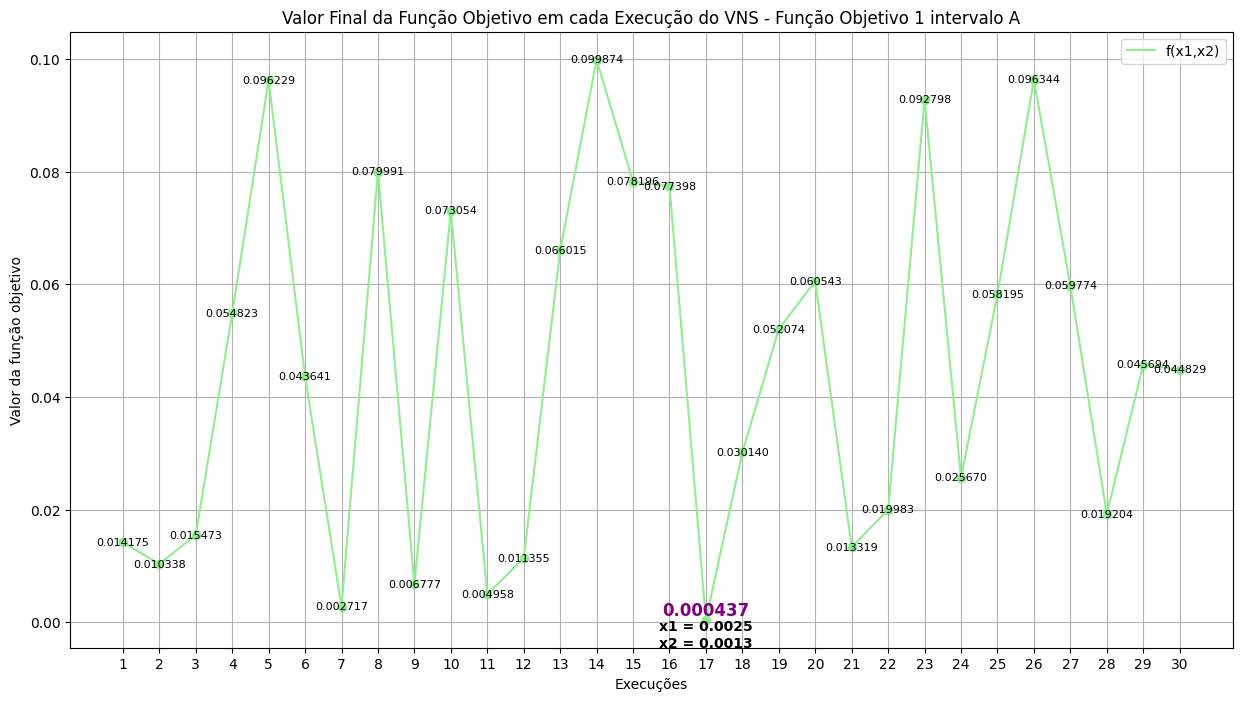

In [12]:
objetivoFinalCadaIteracao(vns_1a, 'f(x1,x2)', 'VNS - Fun√ß√£o Objetivo 1 intervalo A')

#### Intervalo 1B

In [13]:
vns_1b = {'x1':[], 'x2':[], 'f(x1,x2)':[]} 

min = intervalo1_b[0] 
max = intervalo1_b[1]

qtdVariaveisDecisao = 2

for i in range(30):    
    # Chamada ao algoritmo VNS com a quantidade de vari√°veis de decis√£o
    solucao = vns(funcao_objetivo_01, [min] * qtdVariaveisDecisao, [max] * qtdVariaveisDecisao, qtdVariaveisDecisao)
    
    vns_1b['x1'].append(solucao[0]) 
    vns_1b['x2'].append(solucao[1])  
    vns_1b['f(x1,x2)'].append(funcao_objetivo_01(solucao))  # Calcula e armazena o valor da fun√ß√£o objetivo
    

print(vns_1b)

{'x1': [np.float64(0.0016946643760128444), np.float64(-0.0015526212183311627), np.float64(0.018786361908262994), np.float64(0.004144048205948159), np.float64(-0.021818920757749605), np.float64(0.007681096630315465), np.float64(0.004567125962101182), np.float64(0.03361776335351485), np.float64(-0.0010986041282994297), np.float64(0.015406876018003723), np.float64(-0.028289648608270657), np.float64(-0.01666355081275328), np.float64(0.0010985066230009277), np.float64(0.018332851225787983), np.float64(-0.03372429430966939), np.float64(0.0031192139666300633), np.float64(0.005042097565589487), np.float64(0.016644378403937177), np.float64(-0.0029645703068120755), np.float64(0.021715765256267505), np.float64(0.0011232517152442445), np.float64(0.03451157475712319), np.float64(0.006142603931648116), np.float64(-0.007269688300328259), np.float64(0.009781539361922498), np.float64(0.007391634448702056), np.float64(0.02585851464060962), np.float64(0.004432842770997182), np.float64(-0.0091085667800759

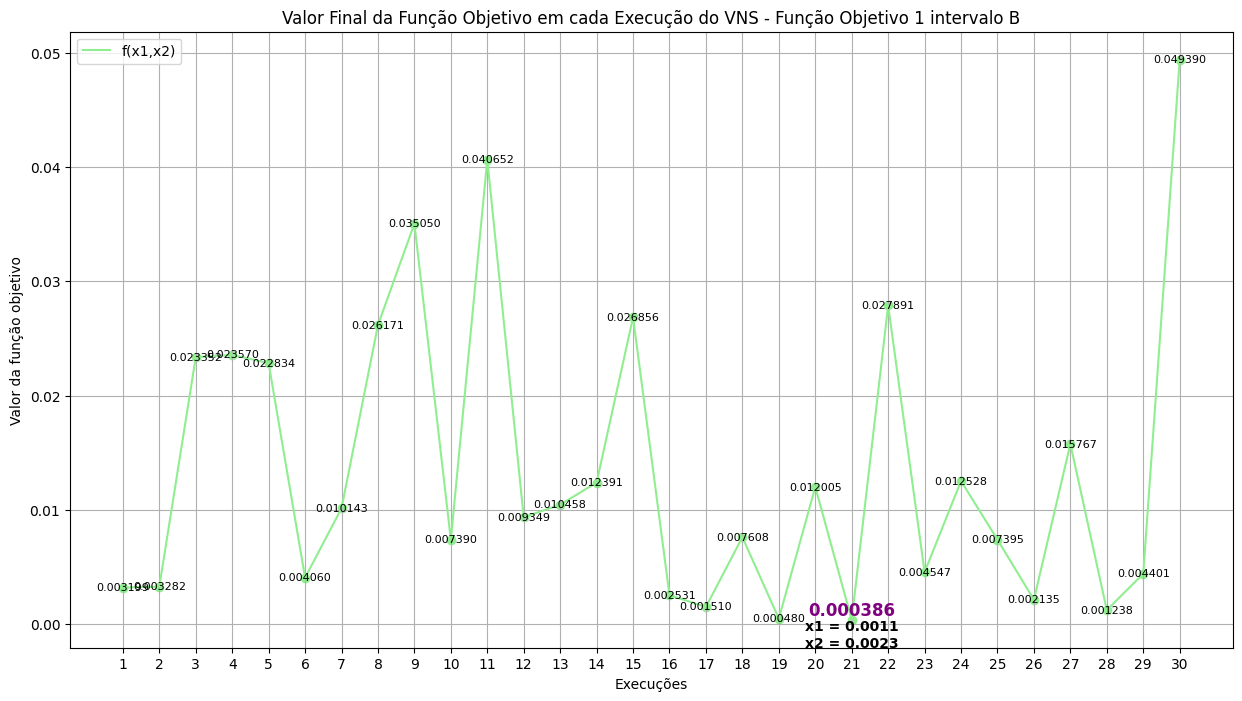

In [14]:
objetivoFinalCadaIteracao(vns_1b, 'f(x1,x2)', 'VNS - Fun√ß√£o Objetivo 1 intervalo B')

#### Intervalo 2A

In [15]:
vns_2a = {'x1': [], 'x2': [], 'x3': [], 'x4': [], 'f(x1,x2,x3,x4)': []}

min_2a = intervalo2_a[0]  
max_2a = intervalo2_a[1]

qtdVariaveisDecisao=4

for i in range(30):
    # Chamada ao VNS com a quantidade de vari√°veis de decis√£o definida como 4
    solucao = vns(funcao_objetivo_02, [min_2a]* qtdVariaveisDecisao, [max_2a]* qtdVariaveisDecisao, qtdVariaveisDecisao)
    
    # Armazenando os resultados no dicion√°rio
    vns_2a['x1'].append(solucao[0])
    vns_2a['x2'].append(solucao[1])
    vns_2a['x3'].append(solucao[2])
    vns_2a['x4'].append(solucao[3])
    vns_2a['f(x1,x2,x3,x4)'].append(funcao_objetivo_02(solucao))

print(vns_2a)


{'x1': [np.float64(1.4688079664777152), np.float64(1.0334666882395966), np.float64(0.9485842110184378), np.float64(0.8916795925532048), np.float64(1.134015238922276), np.float64(1.2308901903302938), np.float64(0.13775674768884694), np.float64(0.7342744015979348), np.float64(0.9927881284123641), np.float64(0.8099209223484976), np.float64(0.940721092931262), np.float64(0.7434951732241202), np.float64(0.7697054942151096), np.float64(0.9507369945163092), np.float64(1.4132538870947708), np.float64(1.120577830993782), np.float64(0.7823359923760447), np.float64(1.4155342452641386), np.float64(0.9523206504615088), np.float64(1.0559144215619631), np.float64(1.0523197820824879), np.float64(0.9255800022247107), np.float64(0.7858452837786065), np.float64(0.9812386838405586), np.float64(1.1022230762326555), np.float64(0.22867883401521216), np.float64(0.1677906458210974), np.float64(1.1020966502135268), np.float64(0.6133734754635474), np.float64(1.0788297383981837)], 'x2': [np.float64(2.142518959027

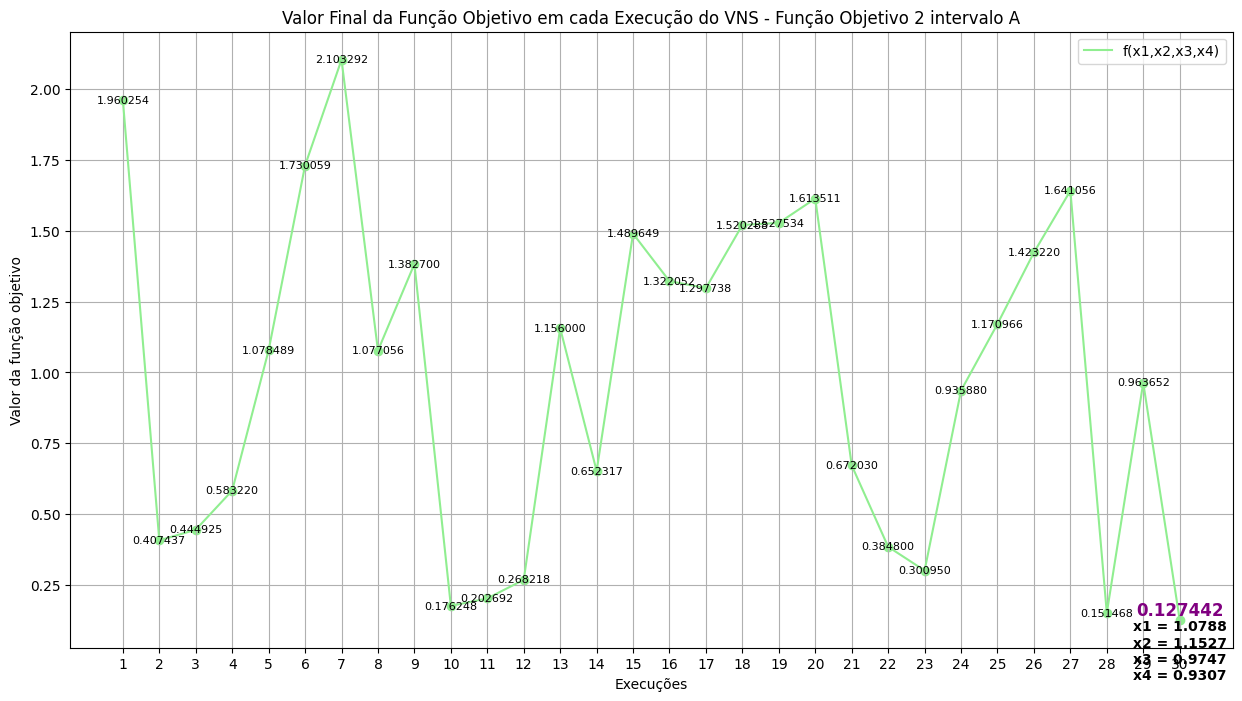

In [16]:
objetivoFinalCadaIteracao(vns_2a, 'f(x1,x2,x3,x4)', 'VNS - Fun√ß√£o Objetivo 2 intervalo A')


#### Intervalo 2B


In [17]:
vns_2b = {'x1': [], 'x2': [], 'x3': [], 'x4': [], 'f(x1,x2,x3,x4)': []}

min_2b = intervalo2_b[0]  
max_2b = intervalo2_b[1] 

qtdVariaveisDecisao=4

for i in range(30):
    solucao = vns(funcao_objetivo_02, [min_2b]*qtdVariaveisDecisao, [max_2b]*qtdVariaveisDecisao, qtdVariaveisDecisao)
    
    vns_2b['x1'].append(solucao[0])
    vns_2b['x2'].append(solucao[1])
    vns_2b['x3'].append(solucao[2])
    vns_2b['x4'].append(solucao[3])
    vns_2b['f(x1,x2,x3,x4)'].append(funcao_objetivo_02(solucao))

print(vns_2b)


{'x1': [np.float64(1.0116141703404236), np.float64(0.8545144228416147), np.float64(0.9066009772448016), np.float64(1.0083860103860816), np.float64(1.0465416289810265), np.float64(0.8086703879833587), np.float64(0.7600025841178615), np.float64(0.8880703289662588), np.float64(1.0104715001361122), np.float64(0.9728217462928359), np.float64(0.8017015061678272), np.float64(-0.9757499101078431), np.float64(0.8159828639141367), np.float64(0.8844647924160435), np.float64(0.7783800374070696), np.float64(0.9204325484762017), np.float64(0.9245974945955912), np.float64(1.086501612657445), np.float64(0.9563401405811608), np.float64(1.187215865572287), np.float64(1.0508222517894943), np.float64(1.0010773356277403), np.float64(0.8764606448131032), np.float64(1.0505749797964978), np.float64(1.1092742438181848), np.float64(0.9578110006855872), np.float64(1.1404060919299495), np.float64(-0.01863190661679004), np.float64(1.256865383680678), np.float64(1.0249224491116873)], 'x2': [np.float64(1.00210451218

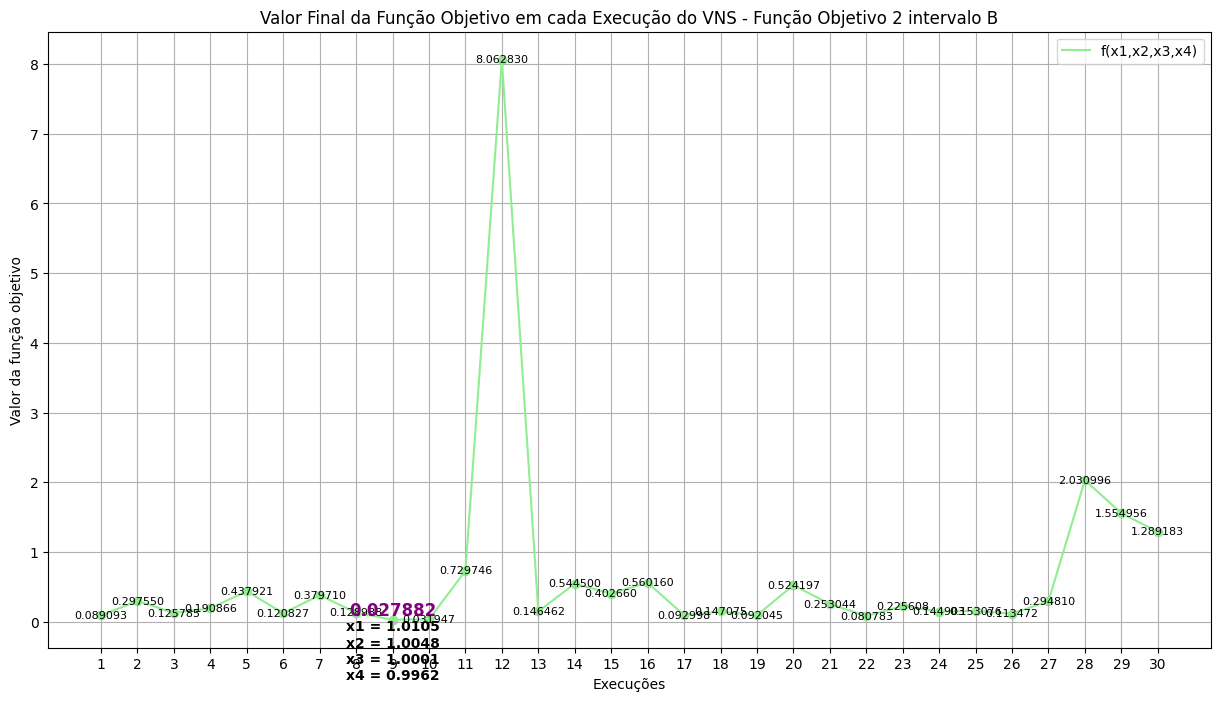

In [18]:
objetivoFinalCadaIteracao(vns_2b, 'f(x1,x2,x3,x4)', 'VNS - Fun√ß√£o Objetivo 2 intervalo B')

### 2.2 Simulated Annealing (SA)

#### 2.2.1. Conceito do Algoritmo

O **Simulated Annealing** √© inspirado no processo de recozimento em metalurgia:

1- **Temperatura alta** ‚Üí Aceita solu√ß√µes piores (explora√ß√£o).

2- **Temperatura baixa** ‚Üí Aceita apenas melhoras (exploitation).

3- **Resfriamento gradual** ‚Üí Reduz a temperatura ao longo do tempo.

#### 2.2.2 Passos do algor√≠tmo

```python
# 1. INICIALIZA√á√ÉO
x_atual ‚Üê SOLU√á√ÉO_ALEAT√ìRIA(limites, dimensao)  # Gera solu√ß√£o inicial
f_atual ‚Üê funcao_objetivo(x_atual)
T ‚Üê 1000                                        # Temperatura inicial
alpha ‚Üê 0.95                                    # Taxa de resfriamento
historico_melhores ‚Üê [f_atual]                  # Armazena hist√≥rico

# 2. LOOP TERMAL PRINCIPAL
ENQUANTO T > 0.01 FA√áA:
    PARA i DE 1 AT√â 100 FA√áA:                   # Itera√ß√µes por temperatura
        
        # 2.1 GERA√á√ÉO DE VIZINHO
        x_vizinho ‚Üê PERTURBA(x_atual, limites)
        f_vizinho ‚Üê funcao_objetivo(x_vizinho)
        delta ‚Üê f_vizinho - f_atual
        
        # 2.2 CRIT√âRIO DE ACEITA√á√ÉO
        SE delta < 0 OU rand() < exp(-delta/T) ENT√ÉO:
            x_atual ‚Üê x_vizinho                 # Atualiza solu√ß√£o
            f_atual ‚Üê f_vizinho
            
            # 2.3 ATUALIZA MELHOR SOLU√á√ÉO
            SE f_atual < MIN(historico_melhores):
                melhor_x ‚Üê x_atual
                melhor_f ‚Üê f_atual
    
    # 2.4 RESFRIAMENTO
    T ‚Üê T * alpha                               # Reduz temperatura
    historico_melhores.APPEND(f_atual)          # Registra progresso

RETORNE melhor_x, melhor_f                      # Solu√ß√£o final

#### 2.2.3 Implementa√ß√£o em Python

##### 2.2.3.1 Classe do Simulated Annealing

In [19]:
import math

class SimulatedAnnealing:
    def __init__(self, dimensao, limites, funcao_objetivo):
        self.d = dimensao
        self.limite_inf = limites[0]
        self.limite_sup = limites[1]
        self.funcao_objetivo = funcao_objetivo
    
    def solucao_inicial(self):
        return np.random.uniform(self.limite_inf, self.limite_sup, self.d)
    
    def gerar_vizinho(self, x_atual, passo_max):
        perturbacao = np.random.uniform(-passo_max, passo_max, self.d)
        x_vizinho = x_atual + perturbacao
        return np.clip(x_vizinho, self.limite_inf, self.limite_sup)
    
    def executar(self, n_execucoes = 30, T_inicial = 1000, T_final = 0.01, alpha = 0.95, iteracoes_T = 150, passo_max = None):
        if passo_max is None:
            passo_max = (self.limite_sup - self.limite_inf) * 0.1 # Usa 10% como o padr√£o
        
        resultados = []
        melhores_x = []
        
        for _ in range(n_execucoes):
            x_atual = self.solucao_inicial()
            f_atual = self.funcao_objetivo(x_atual)
            T = T_inicial
            melhor_x = x_atual.copy()
            melhor_f = f_atual
            
            while T > T_final:
                for _ in range(iteracoes_T):
                    x_vizinho = self.gerar_vizinho(x_atual, passo_max)
                    f_vizinho = self.funcao_objetivo(x_vizinho)
                    
                    delta_f = f_vizinho - f_atual
                    
                    if delta_f < 0 or np.random.random() < math.exp(-delta_f / T):
                        x_atual, f_atual = x_vizinho, f_vizinho
                        
                        if f_atual < melhor_f:
                            melhor_f = f_atual
                            melhor_x = x_atual.copy()
                
                T *= alpha  # Resfriamento
            
            resultados.append(melhor_f)
            melhores_x.append(melhor_x)
        
        return {
            'resultados': np.array(resultados),
            'melhores_x': np.array(melhores_x),
            'media': np.mean(resultados),
            'minimo': np.min(resultados),
            'maximo': np.max(resultados),
            'desvio': np.std(resultados)
        }

#### 2.2.4 Execu√ß√£o para Todos os Problemas

#### Intervalo 1A

In [20]:
sa_1a = {'x1': [], 'x2': [], 'f(x1,x2)': []}

min_1a = intervalo1_b[0]
max_1a = intervalo1_b[1]

qtdVariaveisDecisao = 2

# Inicializa a classe SA
sa = SimulatedAnnealing(dimensao=qtdVariaveisDecisao, 
                        limites=[min_1a, max_1a], 
                        funcao_objetivo=funcao_objetivo_01)

resultado_sa = sa.executar(n_execucoes=30)

for x in resultado_sa['melhores_x']:
    sa_1a['x1'].append(x[0])
    sa_1a['x2'].append(x[1])
    sa_1a['f(x1,x2)'].append(funcao_objetivo_01(x))

print(sa_1a)

{'x1': [np.float64(-0.011372474141316147), np.float64(-0.03988438131790595), np.float64(0.5383407426455458), np.float64(-0.03767999874086847), np.float64(0.07258231824579386), np.float64(0.024388681937709933), np.float64(-0.02041509250806328), np.float64(0.043009693660291504), np.float64(0.03590660951842306), np.float64(-0.06133566667650214), np.float64(0.04894277795242896), np.float64(-0.007764369686721118), np.float64(0.3051133063114637), np.float64(0.017877650060087014), np.float64(-0.007636870125855566), np.float64(0.016083678973334514), np.float64(-0.06006209737370405), np.float64(0.583110760530543), np.float64(0.006654800032938724), np.float64(0.005912050137340863), np.float64(0.006742995449507738), np.float64(0.01943548343446988), np.float64(0.00990994616079277), np.float64(0.009808896425275826), np.float64(-0.0643749242556062), np.float64(0.01722641008117698), np.float64(0.02129169849694268), np.float64(0.006823268090338175), np.float64(-0.052957945650673466), np.float64(-0.017

#### Intervalo 1B

In [21]:
sa_1b = {'x1': [], 'x2': [], 'f(x1,x2)': []}

min_1b = intervalo1_b[0]
max_1b = intervalo1_b[1]

qtdVariaveisDecisao = 2

sa = SimulatedAnnealing(dimensao=qtdVariaveisDecisao, 
                        limites=[min_1b, max_1b], 
                        funcao_objetivo=funcao_objetivo_01)

resultado_sa = sa.executar(n_execucoes=30)

for x in resultado_sa['melhores_x']:
    sa_1b['x1'].append(x[0])
    sa_1b['x2'].append(x[1])
    sa_1b['f(x1,x2)'].append(funcao_objetivo_01(x))

print(sa_1b)

{'x1': [np.float64(0.015496873578798365), np.float64(0.009902836884136512), np.float64(0.016868333186952356), np.float64(-0.05224966613428528), np.float64(-0.790270320686969), np.float64(0.3495014425987719), np.float64(0.031078433150640628), np.float64(-0.05102495171540333), np.float64(-0.04302162390088338), np.float64(-0.015434165101586572), np.float64(-0.029847858983729658), np.float64(0.004491283033305038), np.float64(0.02396418133126943), np.float64(0.06652130635445808), np.float64(-0.049714391789230206), np.float64(-0.009223315443292357), np.float64(-0.051989758019055365), np.float64(-0.003953974301587948), np.float64(-0.01894177139143416), np.float64(-0.01597267857055673), np.float64(0.030008108042649972), np.float64(-0.011253571010024999), np.float64(0.02080923544807156), np.float64(0.021811826823232572), np.float64(0.04952702484802707), np.float64(-0.043225206927286486), np.float64(-0.039238273945307434), np.float64(-0.0163026269013562), np.float64(-0.004832328837619748), np.fl

#### Intervalo 2A

In [22]:
sa_2a = {'x1': [], 'x2': [], 'x3': [], 'x4': [], 'f(x1,x2,x3,x4)': []}

min_2a = intervalo2_a[0]
max_2a = intervalo2_a[1]

qtdVariaveisDecisao = 4

sa2 = SimulatedAnnealing(dimensao=qtdVariaveisDecisao, 
                                limites=[min_2a, max_2a], 
                                funcao_objetivo=funcao_objetivo_02)

resultado_sa_2a = sa2.executar(n_execucoes=30)

for x in resultado_sa_2a['melhores_x']:
    sa_2a['x1'].append(x[0])
    sa_2a['x2'].append(x[1])
    sa_2a['x3'].append(x[2])
    sa_2a['x4'].append(x[3])
    sa_2a['f(x1,x2,x3,x4)'].append(funcao_objetivo_02(x))

print("SA - Resultado 2a")
print(sa_2a)


SA - Resultado 2a
{'x1': [np.float64(0.7874389063936076), np.float64(0.86925138698613), np.float64(1.064576954339671), np.float64(0.8513316686517896), np.float64(1.3274930907038067), np.float64(1.0826531889472775), np.float64(1.1391322331218054), np.float64(1.2404152293266146), np.float64(1.0906208019131074), np.float64(1.1243120702321732), np.float64(1.1435278595802418), np.float64(0.8665375216613009), np.float64(0.4999795287944817), np.float64(1.3073038148256764), np.float64(1.0238107037516717), np.float64(0.9383597458020811), np.float64(0.6682364086010448), np.float64(1.2925004329015457), np.float64(1.061597279397052), np.float64(1.1010151479024435), np.float64(1.3539023723072763), np.float64(1.4493289016509534), np.float64(1.4192388627994372), np.float64(0.7787787009666163), np.float64(1.3502506628581878), np.float64(0.3295539445518991), np.float64(1.3130340868557582), np.float64(1.1617918802796945), np.float64(1.1238504847246356), np.float64(1.1935396737428685)], 'x2': [np.float64

#### Intervalo 2B

In [23]:
sa_2b = {'x1': [], 'x2': [], 'x3': [], 'x4': [], 'f(x1,x2,x3,x4)': []}

min_2b = intervalo2_b[0]
max_2b = intervalo2_b[1]

qtdVariaveisDecisao = 4

sa_exec_2b = SimulatedAnnealing(dimensao=qtdVariaveisDecisao, 
                                limites=[min_2b, max_2b], 
                                funcao_objetivo=funcao_objetivo_02)

resultado_sa_2b = sa_exec_2b.executar(n_execucoes=30)

for x in resultado_sa_2b['melhores_x']:
    sa_2b['x1'].append(x[0])
    sa_2b['x2'].append(x[1])
    sa_2b['x3'].append(x[2])
    sa_2b['x4'].append(x[3])
    sa_2b['f(x1,x2,x3,x4)'].append(funcao_objetivo_02(x))

print("SA - Resultado 2b")
print(sa_2b)

SA - Resultado 2b
{'x1': [np.float64(1.1287097733147409), np.float64(1.0592330685056843), np.float64(0.9380358339619264), np.float64(1.0023806035223308), np.float64(1.0767031312422266), np.float64(1.0054121948179813), np.float64(1.0609608140166253), np.float64(1.0371132860491104), np.float64(1.0989612858078186), np.float64(1.07270417770641), np.float64(0.8998783840307629), np.float64(1.1590649927622132), np.float64(1.0041827867056599), np.float64(0.9331542534050227), np.float64(1.0432993063880085), np.float64(0.8334071104014646), np.float64(0.8310271469196326), np.float64(0.9702505052021225), np.float64(1.0872808848381241), np.float64(0.9833882781418841), np.float64(0.9861533400161285), np.float64(1.0359647091413442), np.float64(1.108835840625935), np.float64(0.9995703212206601), np.float64(1.0259928001438188), np.float64(0.9324394681864823), np.float64(0.6881305467883267), np.float64(1.0302162743817234), np.float64(0.9108766667529031), np.float64(1.016745991745254)], 'x2': [np.float64

#### Fun√ß√£o para exibir o boxplot

In [33]:
def exibirBoxplot(resultados_vns, resultados_sa, titulo):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    sns.boxplot(y=resultados_vns, ax=ax1, color='green')
    sns.boxplot(y=resultados_sa, ax=ax2, color='blue')

    ax1.set_title('VNS', fontsize=10, fontweight='bold')
    ax1.set_ylabel('Valor da Fun√ß√£o Objetivo', fontsize=10)
    ax2.set_title('SA', fontsize=10, fontweight='bold')

    fig.suptitle(titulo, fontsize=12, fontweight='bold')

    plt.tight_layout()
    plt.show() 

#### Fun√ß√£o para gerar as estatisticas

In [ ]:
def estatisticas(resultadosComparar, nome_funcao_objetivo, nomes_algoritmos):
    estatisticas = {
        'algoritmo': [],
        'minimo': [],
        'maximo': [],
        'media': [],
        'dp': []
    }

    variaveis = [chave for chave in resultadosComparar[0].keys() if chave.startswith('x')]

    for var in variaveis:
        estatisticas[f'{var}_minimo'] = []

    for i, resultado in enumerate(resultadosComparar):
        objetivo = resultado[nome_funcao_objetivo]
        estatisticas['algoritmo'].append(nomes_algoritmos[i])
        estatisticas['minimo'].append(np.min(objetivo))
        estatisticas['maximo'].append(np.max(objetivo))
        estatisticas['media'].append(np.mean(objetivo))
        estatisticas['dp'].append(np.std(objetivo))
        indice_minimo = np.argmin(objetivo)

        for var in variaveis:
            estatisticas[f'{var}_minimo'].append(resultado[var][indice_minimo])

    return pd.DataFrame(estatisticas)


Estat√≠sticas Fun√ß√£o 1 - Intervalo 1a
  algoritmo    minimo    maximo     media        dp  x1_minimo  x2_minimo
0       VNS  0.000437  0.099874  0.045134  0.031531   0.002488   0.001305
1        SA  0.002091  0.099893  0.046749  0.037087   0.006743   0.004429 

Estat√≠sticas Fun√ß√£o 1 - Intervalo 1b
  algoritmo    minimo    maximo     media        dp  x1_minimo  x2_minimo
0       VNS  0.000386  0.049390  0.013619  0.012682   0.001123   0.002304
1        SA  0.001045  0.099875  0.045864  0.030736  -0.003954   0.003334 



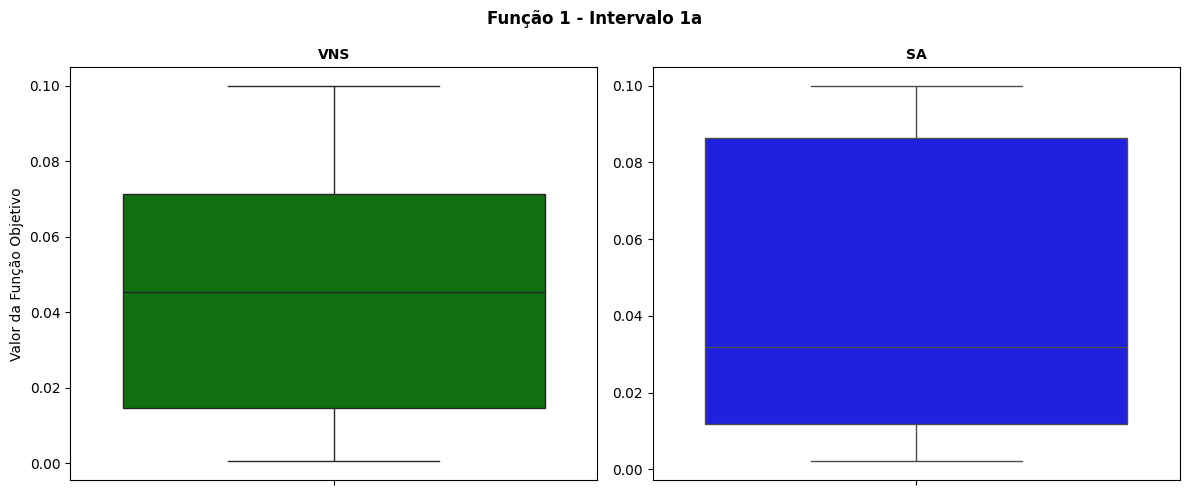

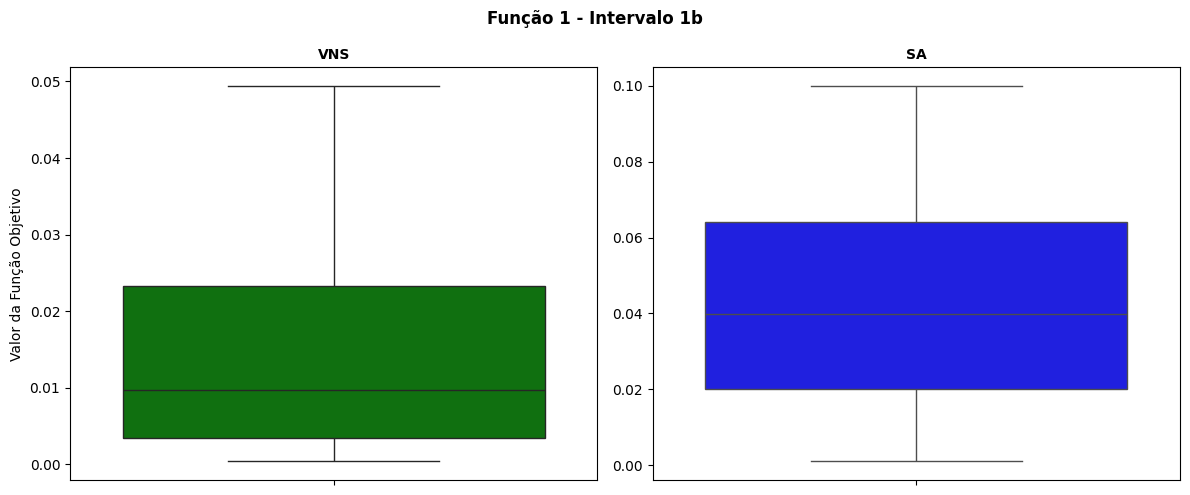

In [49]:
print("Estat√≠sticas Fun√ß√£o 1 - Intervalo 1a")
estat_1a = estatisticas([vns_1a, sa_1a], 'f(x1,x2)', ['VNS', 'SA'])
print(estat_1a, "\n")

print("Estat√≠sticas Fun√ß√£o 1 - Intervalo 1b")
estat_1b = estatisticas([vns_1b, sa_1b], 'f(x1,x2)', ['VNS', 'SA'])
print(estat_1b, "\n")

exibirBoxplot(vns_1a['f(x1,x2)'], sa_1a['f(x1,x2)'], 'Fun√ß√£o 1 - Intervalo 1a')
exibirBoxplot(vns_1b['f(x1,x2)'], sa_1b['f(x1,x2)'], 'Fun√ß√£o 1 - Intervalo 1b')


Estat√≠sticas Fun√ß√£o 2 - Intervalo 2a
  algoritmo    minimo    maximo     media        dp  x1_minimo  x2_minimo  x3_minimo  x4_minimo
0       VNS  0.127442  2.103292  0.992171  0.580095   1.078830   1.152707   0.974696   0.930709
1        SA  0.210874  2.430890  1.291647  0.623434   1.139132   1.325695   0.802588   0.633864 

Estat√≠sticas Fun√ß√£o 2 - Intervalo 2b
  algoritmo    minimo    maximo     media       dp  x1_minimo  x2_minimo  x3_minimo  x4_minimo
0       VNS  0.027882  8.062830  0.642469  1.45206   1.010472   1.004830   1.000086   0.996177
1        SA  0.012862  0.300322  0.106381  0.06498   0.986153   0.969064   1.031186   1.058472 



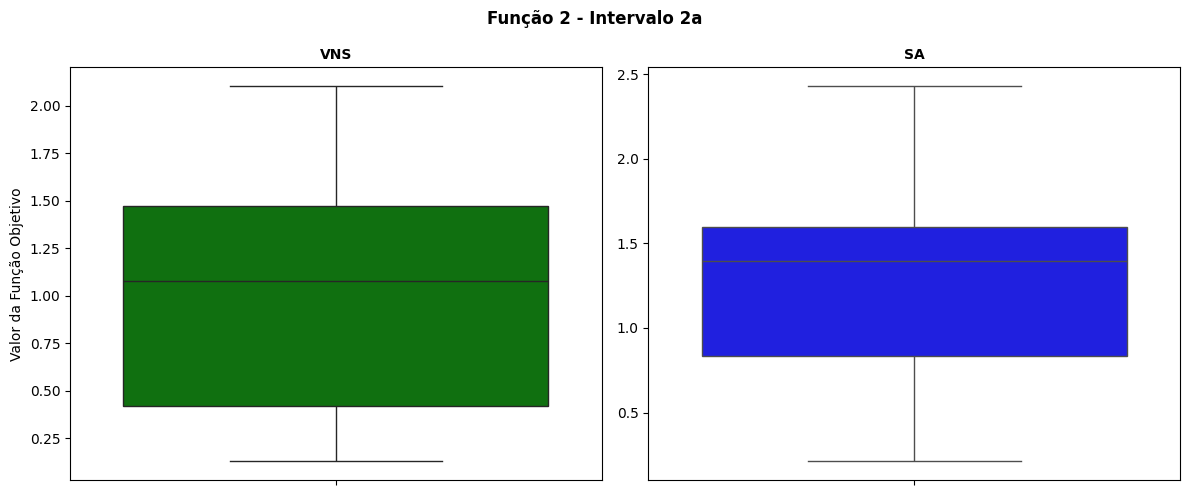

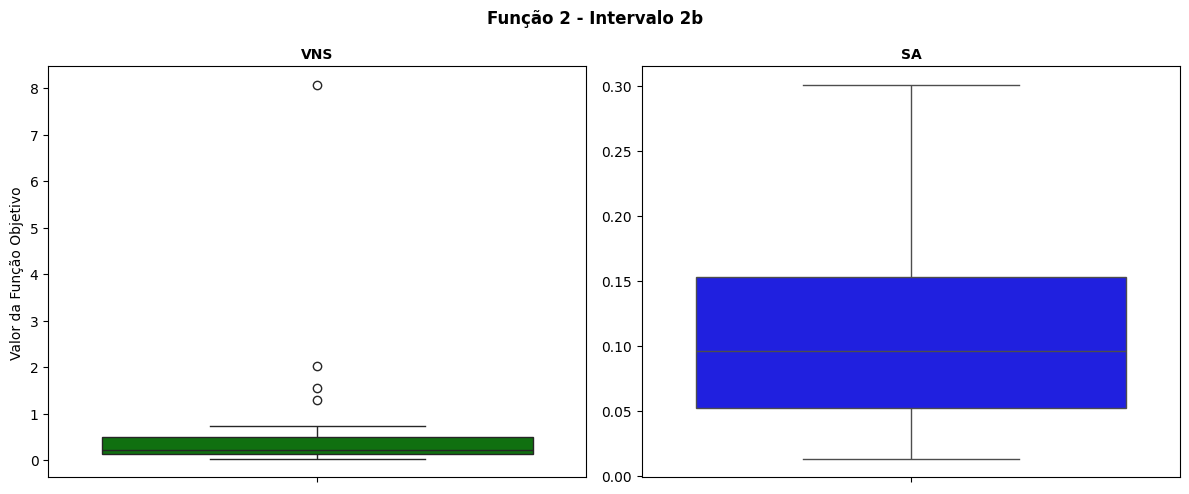

In [50]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

print("Estat√≠sticas Fun√ß√£o 2 - Intervalo 2a")
estat_2a = estatisticas([vns_2a, sa_2a], 'f(x1,x2,x3,x4)', ['VNS', 'SA'])
print(estat_2a, "\n")

print("Estat√≠sticas Fun√ß√£o 2 - Intervalo 2b")
estat_2b = estatisticas([vns_2b, sa_2b], 'f(x1,x2,x3,x4)', ['VNS', 'SA'])
print(estat_2b, "\n")

exibirBoxplot(vns_2a['f(x1,x2,x3,x4)'], sa_2a['f(x1,x2,x3,x4)'], 'Fun√ß√£o 2 - Intervalo 2a')
exibirBoxplot(vns_2b['f(x1,x2,x3,x4)'], sa_2b['f(x1,x2,x3,x4)'], 'Fun√ß√£o 2 - Intervalo 2b')